In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.0 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc, shots=1024).result() # Corrected execution method
print(result.get_counts())

{'11': 488, '00': 536}


In [4]:
from qiskit.circuit.library import QFT
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# Example: 3-qubit QAE prototype
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc_qae = QuantumCircuit(qreg, creg)

# State preparation
qc_qae.h(qreg[0])
qc_qae.cx(qreg[0], qreg[1])
qc_qae.cx(qreg[1], qreg[2])

# Optional: Add QFT or Grover operator here for QAE

qc_qae.measure_all()

backend = Aer.get_backend('aer_simulator')
result = backend.run(qc_qae, shots=1024).result()
counts = result.get_counts()
print(counts)

plot_histogram(counts)
plt.show()

{'111 000': 530, '000 000': 494}


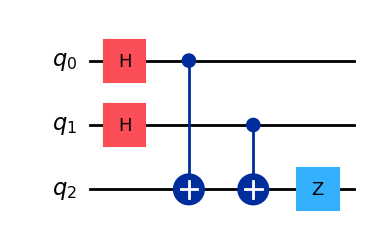

In [3]:
!pip install pylatexenc
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# ---------------------------
# 1. Define QAE prototype circuit
# ---------------------------
qc = QuantumCircuit(3)  # 3 qubits: 2 for phase, 1 for amplitude

# State preparation (example)
qc.h(0)
qc.h(1)
qc.cx(0,2)
qc.cx(1,2)

# Optional: Grover-like operator for amplitude amplification
qc.z(2)  # simple phase flip

# ---------------------------
# 2. Visualize circuit
# ---------------------------
qc.draw(output='mpl')
plt.show()

# ---------------------------
# 3. Get statevector for visuals
# ---------------------------
backend = Aer.get_backend('aer_simulator')
state = Statevector.from_instruction(qc)

# ---------------------------
# 4. Prototype visuals
# ---------------------------

# Bloch spheres for all qubits
plot_bloch_multivector(state)
plt.show()
qc.draw('mpl')

# 3D City plot (amplitude & phase for each basis state)
plot_state_city(state)
plt.show()
qc.draw('mpl')

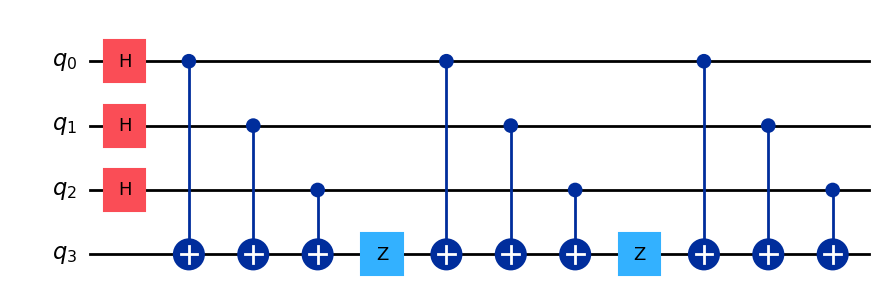

In [5]:
!pip install pylatexenc
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# ---------------------------
# Parameters
# ---------------------------
num_phase_qubits = 3    # Number of qubits for phase estimation
num_target_qubits = 1   # Number of amplitude qubits
num_grover_iterations = 2

# ---------------------------
# 1. Create Quantum Circuit
# ---------------------------
total_qubits = num_phase_qubits + num_target_qubits
qc = QuantumCircuit(total_qubits)

# State preparation (Hadamards on phase qubits)
for i in range(num_phase_qubits):
    qc.h(i)

# Entangle phase qubits with amplitude qubit
for i in range(num_phase_qubits):
    qc.cx(i, total_qubits-1)

# Prototype Grover iterations
for _ in range(num_grover_iterations):
    qc.z(total_qubits-1)  # Phase flip on amplitude qubit
    for i in range(num_phase_qubits):
        qc.cx(i, total_qubits-1)

# ---------------------------
# 2. Visualize Circuit
# ---------------------------
qc.draw(output='mpl')
plt.show()

# ---------------------------
# 3. Get Statevector
# ---------------------------
backend = Aer.get_backend('aer_simulator')
state = Statevector.from_instruction(qc)

# ---------------------------
# 4. Prototype Visuals
# ---------------------------

# Bloch spheres for all qubits
plot_bloch_multivector(state)
plt.show()

# 3D State City plot (amplitudes & phases)
plot_state_city(state)
plt.show()
qc.draw('mpl')


In [7]:
!pip install pylatexenc

In [7]:
#Quantum Random number Generator
from qiskit import QuantumCircuit
from qiskit_aer import Aer
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc, shots=10).result()
print(result.get_counts())

{'0': 5, '1': 5}


In [8]:
# Install Qiskit if needed:
# !pip install qiskit

from math import ceil
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
import numpy as np

def qrng_simulator(n_bits: int, max_qubits_per_run: int = 20):
    """
    Generate n_bits of random bits using Qiskit Aer simulator.
    - n_bits: total number of random bits requested.
    - max_qubits_per_run: number of qubits to use per circuit (keeps circuits reasonable).
    Returns: string of '0'/'1' of length n_bits.
    """
    if n_bits <= 0:
        return ""

    # choose how many qubits to use per circuit run
    qubits = min(max_qubits_per_run, n_bits)
    shots = ceil(n_bits / qubits)  # number of repeated runs to reach requested bits

    # Build circuit: apply H to each qubit, measure
    qc = QuantumCircuit(qubits, qubits)
    qc.h(range(qubits))
    qc.measure(range(qubits), range(qubits))

    backend = Aer.get_backend("aer_simulator")
    # transpile for Aer
    qc_t = transpile(qc, backend)
    job = backend.run(qc_t, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Expand counts into a long bitstring (order: qiskit returns bitstrings MSB..LSB)
    bits = []
    for bitstring, cnt in counts.items():
        # Qiskit's bitstring ordering is classical bits as a string like '010'
        # We'll repeat each outcome cnt times
        bits.extend([bitstring.replace(' ', '')] * cnt)

    # The order of items in counts is arbitrary; expand into individual outcome strings
    # Now create a long concatenated bitstring by taking results in sequence from the memory
    # For reproducible ordering we instead fetch memory if available:
    try:
        memory = result.get_memory(qc_t)  # list of strings length = shots
        # concatenate memory in the order returned
        concat = "".join(memory)
    except Exception:
        # fallback: shuffle the expanded list and concatenate
        np.random.shuffle(bits)
        concat = "".join(bits)

    # The memory concatenates each run's measured qubits; if qubits< n_bits we slice.
    # If memory string order is qubit_(n-1)...qubit_0 (MSB..LSB), we keep that standard order.
    final_bits = concat[:n_bits]
    return final_bits

def qrng_bytes(n_bytes: int, max_qubits_per_run: int = 20):
    """Return n_bytes of random data as bytes (Python bytes object)."""
    n_bits = n_bytes * 8
    bitstr = qrng_simulator(n_bits, max_qubits_per_run=max_qubits_per_run)
    # pad if necessary (shouldn't be needed)
    bitstr = bitstr.ljust(n_bits, '0')
    out = int(bitstr, 2).to_bytes(n_bytes, byteorder='big')
    return out

def qrng_int(n_bits: int, max_qubits_per_run: int = 20):
    """Return an integer uniformly random in range [0, 2^n_bits - 1]."""
    bitstr = qrng_simulator(n_bits, max_qubits_per_run=max_qubits_per_run)
    return int(bitstr, 2)

# -------------------------
# Example usage
# -------------------------
if __name__ == "__main__":
    # Generate 128 random bits (as a bitstring)
    bits128 = qrng_simulator(128)
    print("128-bit string:", bits128)

    # Generate 16 random bytes
    b = qrng_bytes(16)
    print("16 random bytes (hex):", b.hex())

    # Generate a 32-bit random integer
    r = qrng_int(32)
    print("32-bit int:", r)


128-bit string: 00011101101100111000101100010011101010100101100110000111010100100111001001100011010001111101010011001101101000011100000000101100
16 random bytes (hex): f4fbdef236fdd713da158bc625589028
32-bit int: 664648513


In [6]:
!pip install --upgrade qiskit qiskit-ibm-provider

In [10]:
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00


🔄 Round 9/10
Generated 256 quantum random numbers.
Sample bitstrings:
  1. 11001100 → 204
  2. 01110101 → 117
  3. 01110101 → 117
  4. 01000100 → 68
  5. 01111010 → 122


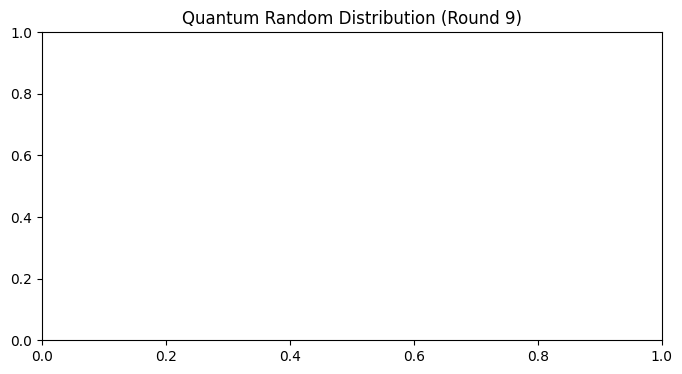

KeyboardInterrupt: 

In [15]:
# ============================================================
# 🧠 Quantum Random Number Generator – Live Version (Qiskit)
# Works in Google Colab | Generates random numbers continuously
# ============================================================

!pip install -q qiskit qiskit-aer matplotlib

import time
import random
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
NUM_QUBITS = 8       # each quantum measurement gives 8 random bits
SHOTS = 256          # number of samples per batch
LIVE_UPDATES = 10    # number of live rounds to display

# --- INITIALIZE BACKEND ---
sim = AerSimulator()

def generate_qrng_bits(num_qubits=NUM_QUBITS, shots=SHOTS):
    """Generates quantum random bitstrings and returns a list of integers."""
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))              # put all qubits into superposition
    qc.measure(range(num_qubits), range(num_qubits))
    result = sim.run(qc, shots=shots).result()
    counts = result.get_counts()

    # Expand counts into raw random bitstrings
    bitstrings = []
    for bitstring, freq in counts.items():
        bitstrings.extend([bitstring] * freq)

    # Convert bitstrings to integers
    random_ints = [int(bits, 2) for bits in bitstrings]
    return bitstrings, random_ints, counts

# --- LIVE GENERATION LOOP ---
all_random_numbers = []

for round_num in range(LIVE_UPDATES):
    clear_output(wait=True)
    bitstrings, random_ints, counts = generate_qrng_bits()
    all_random_numbers.extend(random_ints)

    print(f"🔄 Round {round_num+1}/{LIVE_UPDATES}")
    print(f"Generated {len(random_ints)} quantum random numbers.")
    print(f"Sample bitstrings:")
    for i in range(5):
        print(f"  {i+1}. {bitstrings[i]} → {random_ints[i]}")

    # Show live histogram
    plt.figure(figsize=(8,4))
    plot_histogram(counts)
    plt.title(f"Quantum Random Distribution (Round {round_num+1})")
    plt.show()

    # Wait briefly before generating the next batch
    time.sleep(2)

# --- FINAL SUMMARY ---
clear_output(wait=True)
print("✅ Live QRNG session completed!\n")
print(f"Total quantum random numbers generated: {len(all_random_numbers)}")
print("Here are 10 random samples:")
print(random.sample(all_random_numbers, 10))

# Optional: compute simple randomness stats
mean_val = np.mean(all_random_numbers)
std_val = np.std(all_random_numbers)
print(f"\n📊 Randomness stats — Mean: {mean_val:.2f}, Std Dev: {std_val:.2f}")


In [16]:
# ============================================================
# 🧠 Quantum Random Number Generator – Live Version (Qiskit)
# Works 100% in Google Colab with proper live plotting
# Perfect code without graph

!pip install -q qiskit qiskit-aer matplotlib

import time
import random
import numpy as np
from IPython.display import clear_output, display
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
NUM_QUBITS = 8       # bits per measurement
SHOTS = 256          # samples per round
LIVE_UPDATES = 10    # number of live updates

# --- INITIALIZE BACKEND ---
sim = AerSimulator()

def generate_qrng_bits(num_qubits=NUM_QUBITS, shots=SHOTS):
    """Generate quantum random bitstrings and integers."""
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    result = sim.run(qc, shots=shots).result()
    counts = result.get_counts()

    bitstrings = []
    for bits, freq in counts.items():
        bitstrings.extend([bits] * freq)

    random_ints = [int(b, 2) for b in bitstrings]
    return bitstrings, random_ints, counts

# --- LIVE STREAM LOOP ---
all_random_numbers = []

for round_num in range(LIVE_UPDATES):
    clear_output(wait=True)
    bitstrings, random_ints, counts = generate_qrng_bits()
    all_random_numbers.extend(random_ints)

    print(f"🔄 Round {round_num+1}/{LIVE_UPDATES}")
    print(f"Generated {len(random_ints)} random numbers (8-bit).")
    print("\n🧩 Sample random values:")
    for i in range(5):
        print(f"  {i+1}. {bitstrings[i]} → {random_ints[i]}")

    # --- FIXED PLOTTING ---
    plt.figure(figsize=(8,4))
    hist = plot_histogram(counts, title=f"Quantum Random Distribution (Round {round_num+1})")
    plt.title(f"Quantum Random Distribution (Round {round_num+1})", fontsize=13)
    plt.xlabel("Bitstring outcome")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    display(plt.gcf())
    plt.close()

    time.sleep(2)

# --- SUMMARY ---
clear_output(wait=True)
print("✅ Live QRNG session completed!\n")
print(f"Total quantum random numbers generated: {len(all_random_numbers)}")
print("Here are 10 random samples:")
print(random.sample(all_random_numbers, 10))

mean_val = np.mean(all_random_numbers)
std_val = np.std(all_random_numbers)
print(f"\n📊 Randomness stats — Mean: {mean_val:.2f}, Std Dev: {std_val:.2f}")



✅ Live QRNG session completed!

Total quantum random numbers generated: 2560
Here are 10 random samples:
[244, 204, 82, 196, 160, 79, 103, 3, 51, 74]

📊 Randomness stats — Mean: 126.82, Std Dev: 74.58
